## Objective

### Perform data cleaning and exploratory data analysis (EDA) on a dataset . Explore the relationships between variables and identify patterns and trends in the data.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv(r"D:\edu\PRDG_INFTCH\Data_Science_folder\archive\titanic_dataset.csv") 
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.describe(include="object")  

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [6]:
df.isnull().sum()/df.shape[0] 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

####  MISSING VALUE TREATMENT  

In [7]:
#since there are 78% missing values present in the Cabin feature therefore we can delete this feature 
df.drop(columns=["Cabin"],inplace=True) 
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [8]:
#there are 0.2% missing value in fare so we can remove the missing rows 
df.dropna(subset=["Fare"],inplace=True) 
df.shape

(417, 11)

In [9]:
#converting Age column to integer first 
df["Age"]=df["Age"].astype("float64") 

#filling the missing values in age with the mean value 
df["Age"].fillna(np.mean(df["Age"]),inplace=True)  

In [10]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


### UNIVARIATE ANALYSIS 

In [12]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.181269,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562331,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.181269,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200




**Overall Observations:**

- The dataset contains 417 passengers.

**Column-wise Analysis:**

**PassengerId:**

- The range of passenger IDs is from 892 to 1309.
- The mean (average) ID is 1100.64.

**Survived:**

- This is a binary variable indicating whether a passenger survived (1) or not (0).
- The mean of 0.3645 suggests that approximately 36.45% of the passengers survived.
- This is a relatively low survival rate, reflecting the tragic nature of the Titanic disaster.

**Pclass (Passenger Class):**

- This variable indicates the passenger's class of travel (1st, 2nd, or 3rd).
- The mean of 2.2638 suggests that the majority of passengers were in the 3rd class, which was the most affordable and hence most populated class.

**Age:**

- The mean age of passengers is 30.18 years.
- The youngest passenger was 0.17 years old, and the oldest was 76 years old.
- The median (50th percentile) age is also 30.18 years, indicating a fairly symmetric distribution of ages.

**SibSp (Number of Siblings/Spouses):**

- This variable indicates the number of siblings or spouses a passenger had on board.
- The mean of 0.4484 suggests that on average, a passenger had less than half a sibling or spouse traveling with them.

**Parch (Number of Parents/Children):**

- This variable indicates the number of parents or children a passenger had on board.
- The mean of 0.3933 suggests that on average, a passenger had less than half a parent or child traveling with them.

**Fare:**

- The mean fare paid by passengers was 35.63.
- The minimum fare was 0, and the maximum fare was 512.33.
- The wide range in fares reflects the different classes of travel and the varying affordability of tickets.

**Additional Insights:**

- The standard deviation (std) for each variable gives a measure of how spread out the data is. For example, the high standard deviation for the Fare variable indicates that there was a wide range of ticket prices.
- The quartiles (25%, 50%, and 75%) provide information about the distribution of the data. For example, the 25th percentile for Age is 23, meaning that 25% of passengers were 23 years old or younger.




In [13]:
df.describe(include="object") 

,Name,Sex,Ticket,Embarked
count,417,417,417,417
unique,417,2,362,3
top,"Kelly, Mr. James",male,PC 17608,S
freq,1,265,5,269




**Overall Observations:**

- This output focuses on the categorical variables in the dataset, which are:
    - Name
    - Sex
    - Ticket
    - Embarked

**Column-wise Analysis:**

**Name:**

- There are 417 unique names in the dataset, meaning each passenger has a distinct name.
- The top name is "Kelly, Mr. James", which appears once.

**Sex:**

- There are only 2 unique values for sex: "male" and "female".
- The most frequent sex is "male", with 265 occurrences.

**Ticket:**

- There are 362 unique ticket numbers, indicating that many passengers shared the same ticket.
- The most frequent ticket number is "PC 17608", which appears 5 times.

**Embarked:**

- This variable represents the port of embarkation (where the passenger boarded the ship).
- There are 3 unique values for Embarked: "S", "C", and "Q".
- The most frequent port of embarkation is "S", with 269 occurrences.

**Additional Insights:**

- The "unique" value for each variable shows the number of distinct categories within that variable.
- The "top" value shows the most frequently occurring category for each variable.
- The "freq" value shows the frequency of the top category.






In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


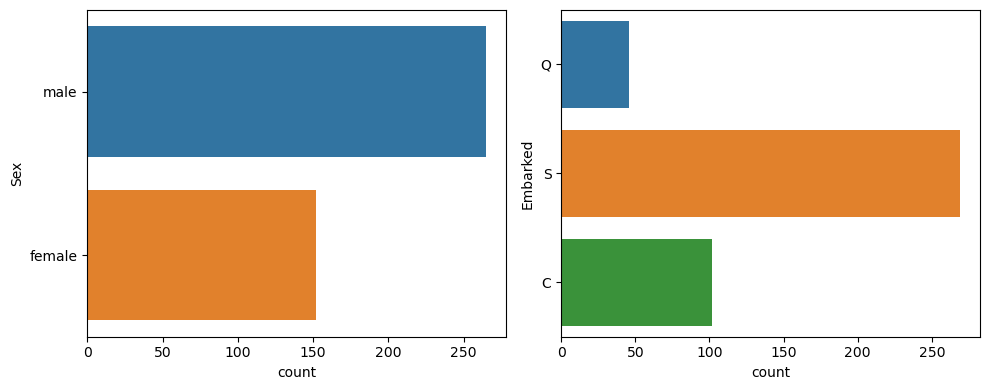

In [26]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.countplot(data=df,y="Sex")

plt.subplot(1,2,2)
sns.countplot(data=df,y="Embarked") 

plt.tight_layout()
plt.show() 



**Overall Observations:**

- These two visualizations offer a visual representation of the distribution of categorical variables in the dataset: Sex and Embarked.
- They use count plots to show the frequency of each category.

**Column-wise Analysis:**

**Sex:**

- The visualization shows that the majority of passengers on the Titanic were male.
- It's clear that the number of male passengers significantly outweighs the number of female passengers.

**Embarked:**

- This visualization shows the distribution of passengers based on their port of embarkation.
- The majority of passengers embarked from "S" (Southampton), followed by "C" (Cherbourg), and then "Q" (Queenstown).




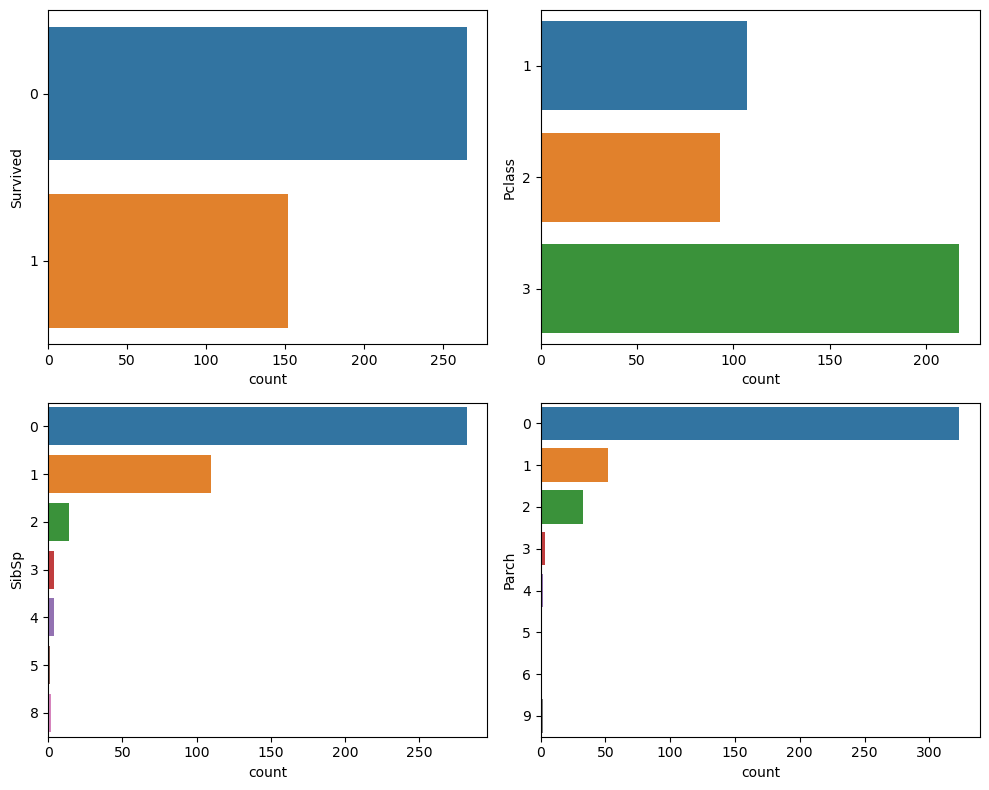

In [33]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(data=df,y="Survived")

plt.subplot(2,2,2)
sns.countplot(data=df,y="Pclass")

plt.subplot(2,2,3)
sns.countplot(data=df,y="SibSp")

plt.subplot(2,2,4)
sns.countplot(data=df,y="Parch")

plt.tight_layout()
plt.show() 



**Overall Observations:**

- These four visualizations offer a visual representation of the distribution of categorical variables in the dataset: Survived, Pclass, SibSp, and Parch.
- They use count plots to show the frequency of each category.

**Column-wise Analysis:**

**Survived:**

- This visualization shows the distribution of passengers based on their survival status.
- The majority of passengers did not survive (0), with a smaller number surviving (1).

**Pclass:**

- This visualization shows the distribution of passengers based on their passenger class.
- The majority of passengers were in the 3rd class, followed by the 1st and 2nd classes.

**SibSp:**

- This visualization shows the distribution of passengers based on the number of siblings or spouses they had on board.
- The majority of passengers had no siblings or spouses (0), followed by those with 1 sibling/spouse (1).

**Parch:**

- This visualization shows the distribution of passengers based on the number of parents or children they had on board.
- The majority of passengers had no parents or children (0), followed by those with 1 parent/child (1).






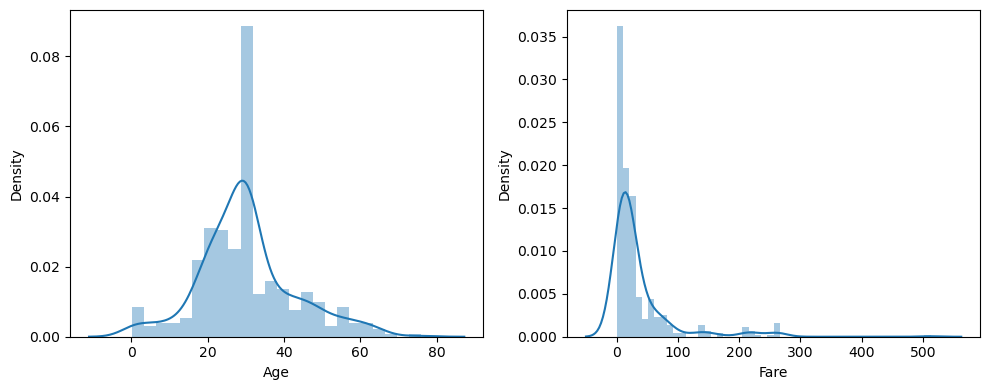

In [35]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.distplot(df["Age"])

plt.subplot(1,2,2)
sns.distplot(df["Fare"]) 

plt.tight_layout()
plt.show() 



### 1. **Age Distribution (Left Plot):**
   - **Shape:** The distribution is approximately normal but slightly skewed to the right. 
   - **Peak:** The histogram indicates that most passengers fall within the age range of 20–40, with a clear peak between 20s and 30s.
   - **Spread:** There are some outliers toward the older ages (above 60), but the majority of values are concentrated below 50.
   - **Conclusion:** The data suggests that a significant proportion of passengers were young adults, and children (age 0–10) also make up a notable group.

### 2. **Fare Distribution (Right Plot):**
   - **Shape:** The distribution is highly right-skewed, indicating that most passengers paid lower fares, while a small number paid significantly higher fares.
   - **Peak:** The highest density of fares is close to 0–50, implying that most passengers traveled in third-class or with discounted fares.
   - **Spread:** There are extreme outliers with fares exceeding 500, indicating first-class passengers or luxurious accommodations.
   - **Conclusion:** The majority of passengers paid modest fares, but a small number paid premium amounts, contributing to the long tail on the right.


### BIVARIATE ANALYSIS 

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='count'>

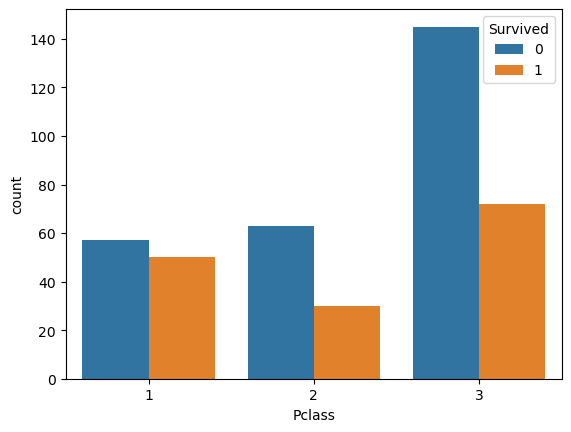

In [39]:
sns.countplot(data=df,x="Pclass",hue="Survived") 

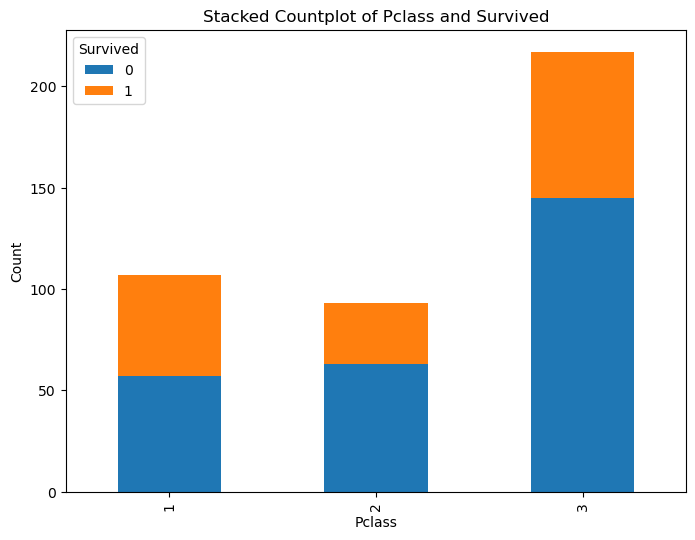

In [40]:
# Creating a crosstab (counts of combinations)
count_data = pd.crosstab(df["Pclass"], df["Survived"])

# Plotting a stacked bar chart
count_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Adding labels and title
plt.title("Stacked Countplot of Pclass and Survived")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show() 



**Overall Observations:**

- This visualization shows the distribution of passengers based on their passenger class (Pclass) and survival status (Survived).
- It uses a stacked bar chart to show the count of passengers in each Pclass, with the bars stacked to represent the proportion of survivors and non-survivors within each class.

**Column-wise Analysis:**

**Pclass:**

- The x-axis represents the passenger class (Pclass).
- The height of each bar represents the total number of passengers in that class.

**Survived:**

- The bars are stacked with two colors:
    - Blue represents the number of passengers who did not survive (Survived = 0).
    - Orange represents the number of passengers who survived (Survived = 1).

**Additional Insights:**

- The stacked bars make it easy to compare the survival rates across different passenger classes.
- We can see that the proportion of survivors decreases as the Pclass increases. This suggests that passengers in higher classes had a better chance of survival.



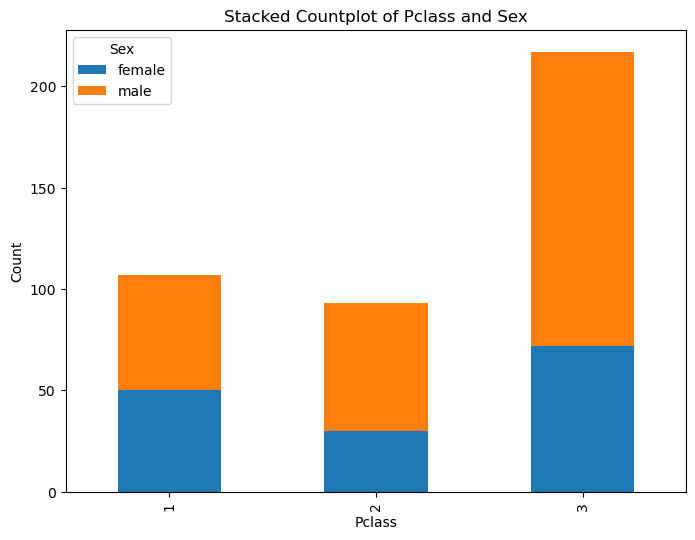

In [41]:
# Creating a crosstab (counts of combinations)
count_data = pd.crosstab(df["Pclass"], df["Sex"])

# Plotting a stacked bar chart
count_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Adding labels and title
plt.title("Stacked Countplot of Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show() 



**Overall Observations:**

- This visualization shows the distribution of passengers based on their passenger class (Pclass) and sex (Sex).
- It uses a stacked bar chart to show the count of passengers in each Pclass, with the bars stacked to represent the proportion of females and males within each class.

**Column-wise Analysis:**

**Pclass:**

- The x-axis represents the passenger class (Pclass).
- The height of each bar represents the total number of passengers in that class.

**Sex:**

- The bars are stacked with two colors:
    - Blue represents the number of female passengers.
    - Orange represents the number of male passengers.

**Additional Insights:**

- The stacked bars make it easy to compare the gender distribution across different passenger classes.
- We can see that in all classes, there were more male passengers than female passengers.
- The difference in the number of males and females is particularly pronounced in the 3rd class.



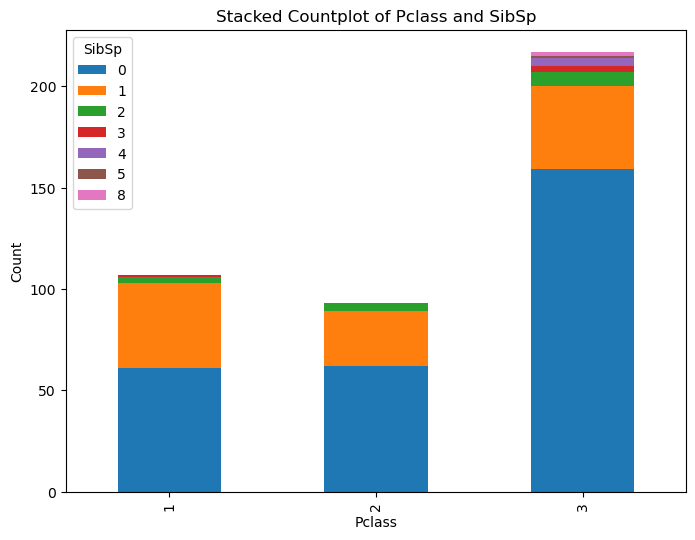

In [43]:
# Creating a crosstab (counts of combinations)
count_data = pd.crosstab(df["Pclass"], df["SibSp"])

# Plotting a stacked bar chart
count_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Adding labels and title
plt.title("Stacked Countplot of Pclass and SibSp")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="SibSp")
plt.show() 



**Overall Observations:**

- This visualization shows the distribution of passengers based on their passenger class (Pclass) and the number of siblings or spouses they had on board (SibSp).
- It uses a stacked bar chart to show the count of passengers in each Pclass, with the bars stacked to represent the proportion of passengers with different numbers of siblings or spouses within each class.

**Column-wise Analysis:**

**Pclass:**

- The x-axis represents the passenger class (Pclass).
- The height of each bar represents the total number of passengers in that class.

**SibSp:**

- The bars are stacked with different colors representing the number of siblings or spouses (SibSp):
    - Blue: 0 siblings/spouses
    - Orange: 1 sibling/spouse
    - Green: 2 siblings/spouses
    - Red: 3 siblings/spouses
    - Purple: 4 siblings/spouses
    - Pink: 5 siblings/spouses
    - Brown: 8 siblings/spouses

**Additional Insights:**

- The stacked bars make it easy to compare the distribution of SibSp across different passenger classes.
- We can see that the majority of passengers in all classes had no siblings or spouses.
- The proportion of passengers with more than one sibling or spouse is higher in the 3rd class compared to the 1st and 2nd classes.



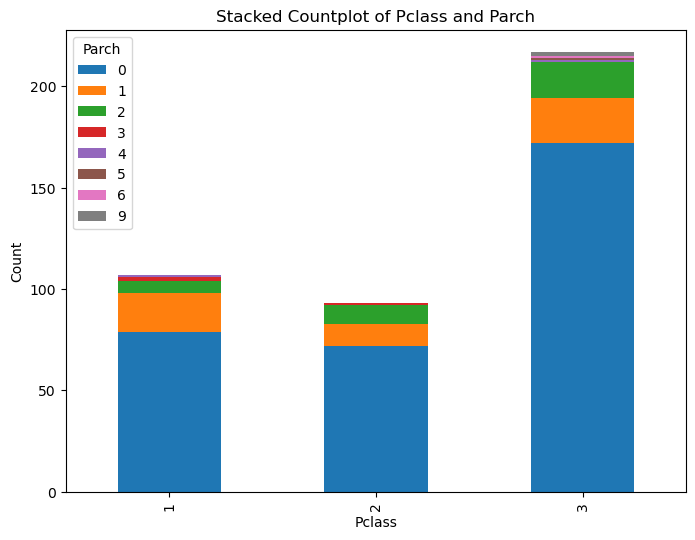

In [44]:
# Creating a crosstab (counts of combinations)
count_data = pd.crosstab(df["Pclass"], df["Parch"])

# Plotting a stacked bar chart
count_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Adding labels and title
plt.title("Stacked Countplot of Pclass and Parch")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Parch")
plt.show() 



**Overall Observations:**

- This visualization shows the distribution of passengers based on their passenger class (Pclass) and the number of parents or children they had on board (Parch).
- It uses a stacked bar chart to show the count of passengers in each Pclass, with the bars stacked to represent the proportion of passengers with different numbers of parents or children within each class.

**Column-wise Analysis:**

**Pclass:**

- The x-axis represents the passenger class (Pclass).
- The height of each bar represents the total number of passengers in that class.

**Parch:**

- The bars are stacked with different colors representing the number of parents or children (Parch):
    - Blue: 0 parents/children
    - Orange: 1 parent/child
    - Green: 2 parents/children
    - Red: 3 parents/children
    - Purple: 4 parents/children
    - Pink: 5 parents/children
    - Brown: 6 parents/children
    - Gray: 9 parents/children

**Additional Insights:**

- The stacked bars make it easy to compare the distribution of Parch across different passenger classes.
- We can see that the majority of passengers in all classes had no parents or children.
- The proportion of passengers with more than one parent or child is higher in the 3rd class compared to the 1st and 2nd classes.



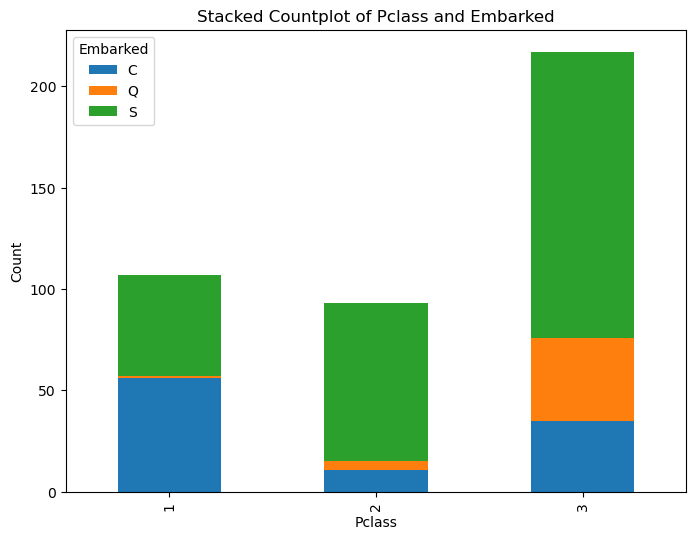

In [45]:
# Creating a crosstab (counts of combinations)
count_data = pd.crosstab(df["Pclass"], df["Embarked"])

# Plotting a stacked bar chart
count_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Adding labels and title
plt.title("Stacked Countplot of Pclass and Embarked")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Embarked")
plt.show() 



**Overall Observations:**

- This visualization shows the distribution of passengers based on their passenger class (Pclass) and port of embarkation (Embarked).
- It uses a stacked bar chart to show the count of passengers in each Pclass, with the bars stacked to represent the proportion of passengers who embarked from different ports within each class.

**Column-wise Analysis:**

**Pclass:**

- The x-axis represents the passenger class (Pclass).
- The height of each bar represents the total number of passengers in that class.

**Embarked:**

- The bars are stacked with different colors representing the port of embarkation:
    - Blue: Cherbourg (C)
    - Orange: Queenstown (Q)
    - Green: Southampton (S)

**Additional Insights:**

- The stacked bars make it easy to compare the distribution of embarkation ports across different passenger classes.
- We can see that the majority of passengers in all classes embarked from Southampton (S).
- The proportion of passengers who embarked from Cherbourg (C) and Queenstown (Q) is higher in the 1st and 2nd classes compared to the 3rd class.



In [46]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

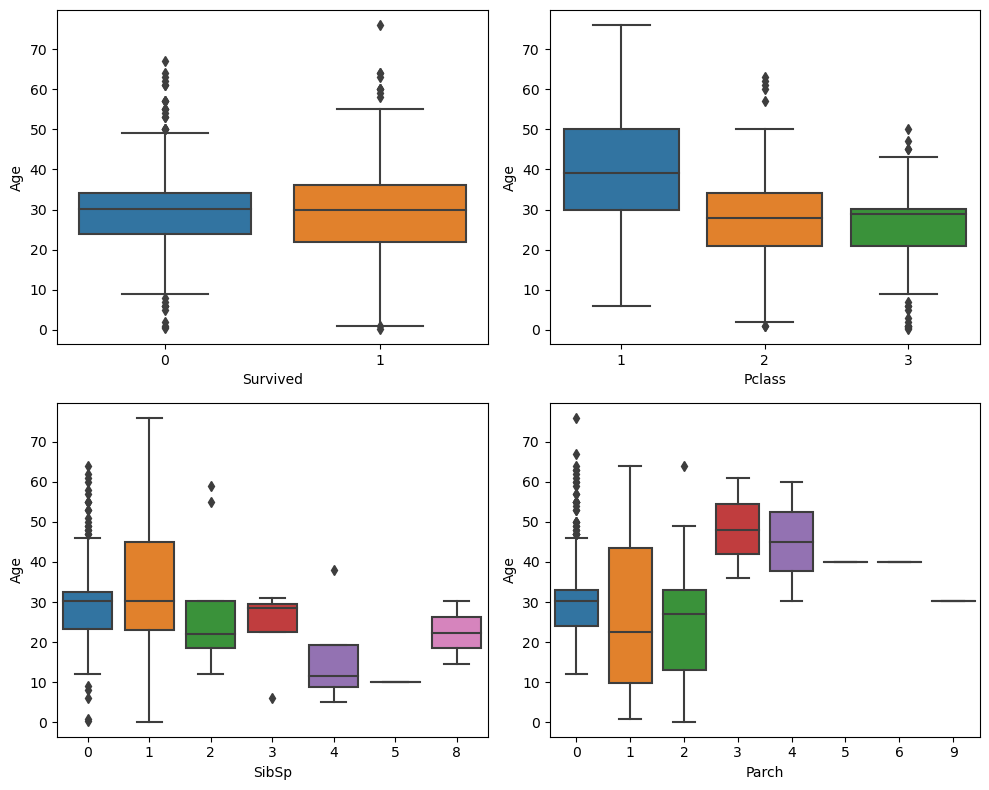

In [48]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(data=df,x="Survived",y="Age")

plt.subplot(2,2,2)
sns.boxplot(data=df,x="Pclass",y="Age")

plt.subplot(2,2,3)
sns.boxplot(data=df,x="SibSp",y="Age")

plt.subplot(2,2,4)
sns.boxplot(data=df,x="Parch",y="Age")

plt.tight_layout()
plt.show()  

These boxplots visualize the distribution of age across different categorical variables in the Titanic dataset. Let's break down what each plot tells us:

**Top Left Plot: Age vs. Survived**

* **Survivors:** The boxplot shows that survivors were generally older than those who didn't survive. The median age for survivors is around 30, while for non-survivors, it's around 28.
* **Outliers:** There are outliers on both sides, indicating some very young and very old passengers in both groups.

**Top Right Plot: Age vs. Pclass**

* **1st Class:** The median age for 1st-class passengers is the highest, around 38.
* **2nd Class:** The median age for 2nd-class passengers is around 30.
* **3rd Class:** The median age for 3rd-class passengers is the lowest, around 25.

**Bottom Left Plot: Age vs. SibSp**

* **No Siblings/Spouses:** The median age for passengers with no siblings or spouses is around 30.
* **1 Sibling/Spouse:** The median age for passengers with one sibling or spouse is around 30.
* **2+ Siblings/Spouses:** As the number of siblings/spouses increases, the median age tends to decrease. This could be due to families with children traveling together.

**Bottom Right Plot: Age vs. Parch**

* **No Parents/Children:** The median age for passengers with no parents or children is around 30.
* **1 Parent/Child:** The median age for passengers with one parent or child is around 30.
* **2+ Parents/Children:** As the number of parents/children increases, the median age tends to decrease. This could be due to families with children traveling together.

**Overall, these boxplots reveal several interesting insights:**

* **Age distribution:** The age distribution varies across different passenger classes, with 1st-class passengers being older on average.
* **Family size and age:** Passengers with larger families tend to be younger, suggesting families with children were more likely to travel together.
* **Survival and age:** There is a slight tendency for older passengers to survive, but this is not a strong correlation.




### MULTIVARIATE ANALYSIS 

In [49]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


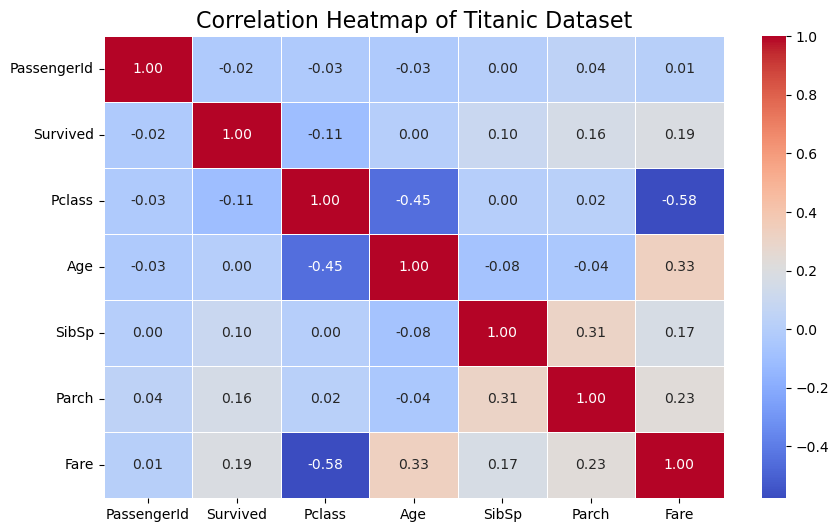

In [50]:

# Selecting only numerical columns
numerical_data = df.select_dtypes(include=["float64", "int64"])

# Computing the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap="coolwarm",  
    fmt=".2f",        
    linewidths=0.5,    
    cbar=True          
)

# Add titles
plt.title("Correlation Heatmap of Titanic Dataset", fontsize=16)
plt.show()

The heatmap above represents the **correlation matrix** of numerical columns in the Titanic dataset. 

---

### 1. **Diagonal Elements (Self-correlation)**
   - The diagonal values are all **1.0**, as every variable is perfectly correlated with itself (e.g., `PassengerId` vs. `PassengerId` = 1.0).

---

### 2. **Key Relationships:**

#### a) **Survived (Target Variable):**
   - **Survived vs Pclass (-0.11):**
     - There is a weak negative correlation, suggesting passengers in higher classes (lower `Pclass` value) were more likely to survive.
   - **Survived vs Fare (0.19):**
     - A weak positive correlation shows that passengers who paid higher fares had slightly higher survival chances.
   - **Survived vs Parch (0.16):**
     - Passengers traveling with family members (parents/children) had a weakly positive correlation with survival.
   - **Survived vs Age (0.00):**
     - No notable correlation between age and survival, though separate analyses may show survival rates by age group.

#### b) **Pclass (Passenger Class):**
   - **Pclass vs Fare (-0.58):**
     - Strong negative correlation indicates that passengers in higher classes (lower `Pclass`) paid significantly more for their tickets.
   - **Pclass vs Age (-0.45):**
     - Moderate negative correlation suggests older passengers tended to belong to higher classes.

#### c) **Fare (Ticket Price):**
   - **Fare vs Age (0.33):**
     - Positive correlation shows that older passengers were more likely to pay higher fares, likely reflecting class preferences.
   - **Fare vs Parch (0.23):**
     - Passengers traveling with family (parents/children) had slightly higher fares, possibly due to group bookings or larger accommodations.

#### d) **SibSp (Siblings/Spouse) and Parch (Parents/Children):**
   - **SibSp vs Parch (0.31):**
     - Moderate positive correlation indicates that passengers traveling with siblings/spouses often traveled with parents/children as well, reflecting family travel patterns.
   - Both have weak correlations with `Fare`, suggesting families tended to pay slightly more.

---

### 3. **Insignificant Relationships:**
   - **PassengerId vs All Variables:**
     - Very close to 0, as `PassengerId` is just an identifier with no meaningful relationship to other variables.
   - **Survived vs Age (0.00):**
     - No correlation, though deeper group analysis (e.g., survival rates for children or elderly) may reveal patterns.

---

### 4. **Color Interpretation:**
   - **Red (Positive Correlation):**
     - Variables with a stronger positive relationship, e.g., `Parch` vs `SibSp` (0.31), `Fare` vs `Age` (0.33).
   - **Blue (Negative Correlation):**
     - Stronger negative relationships, e.g., `Pclass` vs `Fare (-0.58)`, `Pclass` vs `Age (-0.45)`.

---

### 5. **Insights:**
   - Passengers in higher classes (lower `Pclass`) were generally older, paid higher fares, and had better chances of survival.
   - Families traveling together (higher `Parch` and `SibSp`) tended to pay more in fares.
   - Survival seems weakly linked to socio-economic status (fare and class) but not directly to age.

This analysis highlights the importance of certain features (like `Pclass` and `Fare`) for modeling survival probability in the Titanic dataset.